In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Set the data directory and image dimensions
data_dir='D:\\Msc GU\\Msc 4th Sem\\Project\\DataSet\\teadataset'
img_height, img_width = 224, 224
batch_size = 32

# Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Load and preprocess the training dataset
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

# Load and preprocess the validation dataset
val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Load the InceptionV3 base model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False,               
          input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)
model.summary()
# Create the model with InceptionV3 as the base and custom classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=50, validation_data=val_data)

# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_data)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')


Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.
Epoch 1/50
23/23 [==============================] - 139s 6s/step - loss: 1.7732 - accuracy: 0.3713 - val_loss: 1.6627 - val_accuracy: 0.4310
Epoch 2/50
23/23 [==============================] - 133s 6s/step - loss: 1.1669 - accuracy: 0.5752 - val_loss: 1.1718 - val_accuracy: 0.5345
Epoch 3/50
23/23 [==============================] - 128s 6s/step - loss: 0.8741 - accuracy: 0.6807 - val_loss: 1.0854 - val_accuracy: 0.5920
Epoch 4/50
23/23 [==============================] - 141s 6s/step - loss: 0.7621 - accuracy: 0.7257 - val_loss: 1.0035 - val_accuracy: 0.6264
Epoch 5/50
23/23 [==============================] - 132s 6s/step - loss: 0.6839 - accuracy: 0.7496 - val_loss: 1.1006 - val_accuracy: 0.5805
Epoch 6/50
23/23 [==============================] - 127s 6s/step - loss: 0.7101 - accuracy: 0.7243 - val_loss: 1.1060 - val_accuracy: 0.5632
Epoch 7/50
23/23 [==============================] - 141s 6s/step - loss:

In [4]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3


# Load the InceptionV3 base model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False,               
          input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)
# Create the model 
model = Model(inputs=base_model.input, outputs=predictions)


model.summary()

NameError: name 'Model' is not defined

In [3]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()

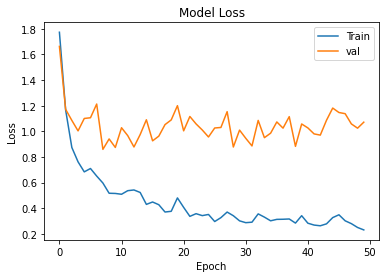

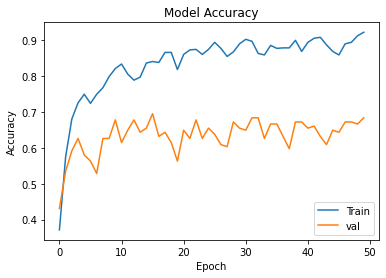

In [4]:
plot_loss(history)
plot_accuracy(history)

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 64s 4s/step - loss: 0.5511 - accuracy: 0.8144
Test Loss: 0.5511040091514587
Test Accuracy: 0.814393937587738


In [10]:
import numpy as np

In [11]:
# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 68s 4s/step


1/1 [==============================] - 7s 7s/step


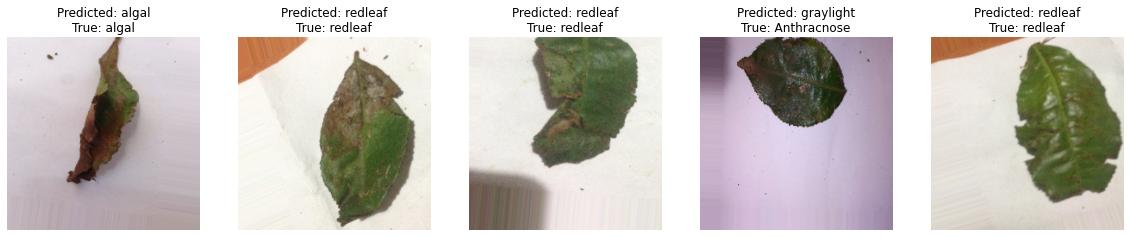

In [12]:
import matplotlib.pyplot as plt

# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


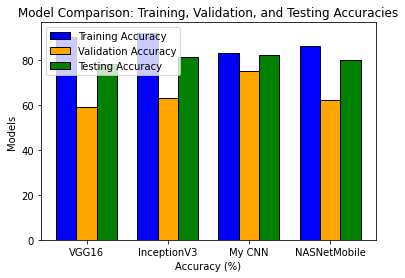

In [14]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
model_names = ['VGG16', 'InceptionV3', 'My CNN', 'NASNetMobile']
train_accuracy = [90, 92, 83, 86]
val_accuracy = [59, 63, 75, 62]
test_accuracy = [78, 81, 82, 80]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar graph
plt.bar(r1, train_accuracy, color='blue', width=bar_width, edgecolor='black', label='Training Accuracy')
plt.bar(r2, val_accuracy, color='orange', width=bar_width, edgecolor='black', label='Validation Accuracy')
plt.bar(r3, test_accuracy, color='green', width=bar_width, edgecolor='black', label='Testing Accuracy')

# Add labels, title, and legend to the graph
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
plt.title('Model Comparison: Training, Validation, and Testing Accuracies')

# Set the x-axis tick labels
plt.xticks([r + bar_width for r in range(len(model_names))], model_names)

# Display the graph
plt.legend()
plt.show()


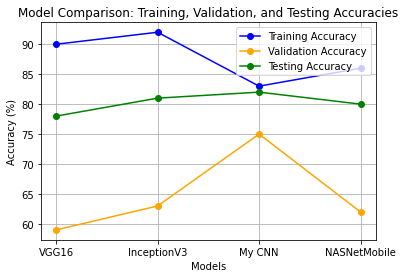

In [15]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
model_names = ['VGG16', 'InceptionV3', 'My CNN', 'NASNetMobile']
train_accuracy = [90, 92, 83, 86]
val_accuracy = [59, 63, 75, 62]
test_accuracy = [78, 81, 82, 80]

# Create the line graph
plt.plot(model_names, train_accuracy, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(model_names, val_accuracy, marker='o', linestyle='-', color='orange', label='Validation Accuracy')
plt.plot(model_names, test_accuracy, marker='o', linestyle='-', color='green', label='Testing Accuracy')

# Add labels, title, and legend to the graph
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Training, Validation, and Testing Accuracies')

# Display the graph
plt.legend()
plt.grid(True)
plt.show()


In [16]:
model.save("D:\\Msc GU\\Msc 4th Sem\\Thesis\\Inception.h5")

In [17]:
# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

17/17 [==============================] - 114s 7s/step


In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# Generate the classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.04      0.03      0.04        60
           1       0.19      0.19      0.19        67
           2       0.11      0.10      0.11        60
           3       0.16      0.21      0.18        67
           4       0.09      0.12      0.10        60
           5       0.07      0.07      0.07        44
           6       0.16      0.15      0.15        85
           7       0.18      0.14      0.16        85

    accuracy                           0.13       528
   macro avg       0.13      0.13      0.13       528
weighted avg       0.13      0.13      0.13       528

